# ❤️Подключение всех необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.simplefilter('ignore')

# ❤️Просматриваем загрузку данных

In [2]:
df = pd.read_csv("intensity.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5,7,1,34.6,...,NaN,NaN,18.0,8.0,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14,45,1,41.3,...,NaN,Без отделки,20.0,11.0,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10,12,1,34.4,...,NaN,"Без отделки, черновая, чистовая",11.8,11.7,7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4,33,1,42.9,...,NaN,NaN,22.9,15.0,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1,16,1,37.7,...,NaN,NaN,NaN,NaN,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


# ❤️Очистка и анализ

для начала поймём, какое количество строк и столбцов у нас есть

In [3]:
print(f'В данных есть {df.shape[0]} строк, {df.shape[1]} столбцы')

В данных есть 10509 строк, 24 столбцы


и проверим какой тип они имеют

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10509 entries, 0 to 10508
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10339 non-null  object 
 1   author_type           10336 non-null  object 
 2   url                   10506 non-null  object 
 3   location              10102 non-null  object 
 4   deal_type             10509 non-null  object 
 5   accommodation_type    10509 non-null  object 
 6   floor                 10509 non-null  int64  
 7   floors_count          10509 non-null  int64  
 8   rooms_count           10509 non-null  int64  
 9   total_meters          10509 non-null  float64
 10  price                 10476 non-null  float64
 11  year_of_construction  8313 non-null   object 
 12  object_type           0 non-null      float64
 13  house_material_type   1242 non-null   object 
 14  heating_type          0 non-null      float64
 15  finish_type        

# ❤️После этой информации, сразу избавимся от значения -1, и заменим float в floor, floors_count, rooms_count, т.к. они должны иметь только тип данных int

In [5]:
# Здесь мы заменяем все значения -1 и -1.0 на NaN, для удобной работы с данными
df = df.replace(-1,np.nan)
df = df.replace("-1",np.nan)
df = df.replace(-1.0,np.nan)
df = df.replace("-1.0",np.nan)
# Удаляем строки, в которых есть пустые значения, т.к. они влияют на цену
df = df.dropna(subset=['location', 'rooms_count', 'price'])
# Перевожу float значения в столбцах floor; floors_count; rooms_count, т.к. они не могут иметь в себе например 2.5 комнаты
df['floor'] = df['floor'].astype(int)
df['floors_count'] = df['floors_count'].astype(int)
df['rooms_count'] = df['rooms_count'].astype(int)
# Удаляю ненужные столбцы, которые не несут нужной информации которая может повлиять на образование цена квартиры, или данные которые имеют только одно значение, такие как deal_type; accomodation_type - они имеют одно статичное значение, тип сделки: продажа, тип помещения - квартира
df.drop(['phone', 'deal_type', 'accommodation_type', 'object_type', 'heating_type'], axis=1, inplace=True)
print(f'Количество столбцов после чистки {df.shape[1]} столбцы')
# Также необходимо в сохранённом файле изменить ��� на 0, для избежания ошибок

Количество столбцов после чистки 19 столбцы


In [6]:
df.isnull().sum()

author                   146
author_type              146
url                        0
location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                      0
year_of_construction    2099
house_material_type     8871
finish_type             8458
living_meters           2316
kitchen_meters          1407
district                4476
street                  1393
house_number            1037
underground             3489
residential_complex     5473
dtype: int64

In [7]:
# Делам проверку на процентный пропуск данных
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 1%
author_type - 1%
url - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
house_material_type - 88%
finish_type - 84%
living_meters - 23%
kitchen_meters - 14%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# ❤️Т.к. в столбцах house_material_type и finish_type большая потеря данных, стоит их удалить, нам невыгодно заполнять их другими значениями в ручную или пытаться их откуда то взять

In [8]:
df.drop(['house_material_type', 'finish_type'], axis=1, inplace=True)

In [9]:
# и сразу проверяем изменения
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 1%
author_type - 1%
url - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
living_meters - 23%
kitchen_meters - 14%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# ❤️Проверка на пропуски в данных

<Axes: >

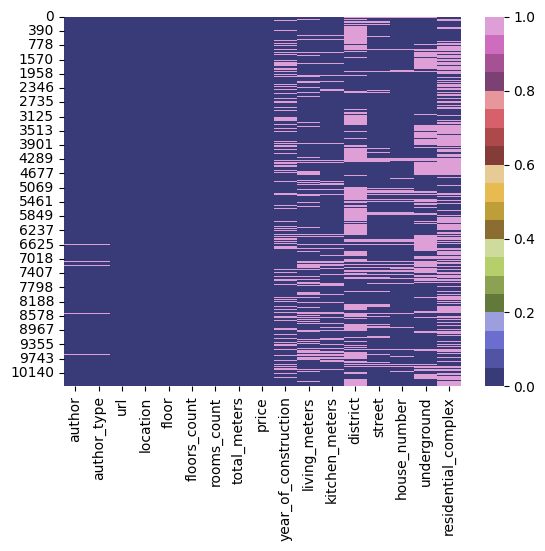

In [10]:
sns.heatmap(df.isnull(),cmap='tab20b')

# ❤️Теперь нужно разобраться с пропуском в living_meters & kitchen_meters

In [11]:
df['living_meters'] = df['living_meters'].fillna(df['living_meters'].mode()) 
df['kitchen_meters'] = df['kitchen_meters'].fillna(df['kitchen_meters'].mode())

In [12]:
# после исправления пропуска проверяем наши данные
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 1%
author_type - 1%
url - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
living_meters - 23%
kitchen_meters - 14%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# ❤️Сделаем фукнцию, которая заменит отсутствующий район на локацию

In [13]:
# Функция для замены пропусков в колонке 'district'
def fill_district(row):
    if pd.isna(row['district']):
        if row['location'] == 'Москва':
            if pd.notna(row['underground']):
                return row['underground']
            else:
                return 'Москва'
        else:
            return row['location']
    else:
        return row['district']
df['district'] = df.apply(fill_district, axis=1)

In [14]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 1%
author_type - 1%
url - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
living_meters - 23%
kitchen_meters - 14%
district - 0%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# ❤️Также давайте избавимся от столбцов house_number & residential_complex, т.к. нам тяжело получить их и не влияют на цену

In [15]:
df.drop(['residential_complex', 'house_number'], axis=1, inplace=True)
df = df.dropna(subset=['underground', 'street'])

In [16]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 1%
author_type - 1%
url - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 18%
living_meters - 24%
kitchen_meters - 13%
district - 0%
street - 0%
underground - 0%


# ❤️Создаём функцию для записи средней цены за м²  каждого города
Открытие новых данных

In [17]:
list_city = df['location'].unique()

def price_for_meter(location):
    city = df[df['location'] == location]
    price_for_city = city['price'].sum()
    
    clean_data = city['total_meters'].sum()
    
    return round(price_for_city/clean_data, 2)

with open('info_of_city_and_price.csv', 'w', newline='', encoding='UTF-8') as csvfile:
    names = ['city', 'price_for_meter']
    writer = csv.DictWriter(csvfile, fieldnames=names)
    writer.writeheader()
    for city in list_city:
        writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})

In [18]:
info = pd.read_csv('sorted_info_of_city_and_price.csv')
info_sorted = info.sort_values(by='price_for_meter', ascending=False)

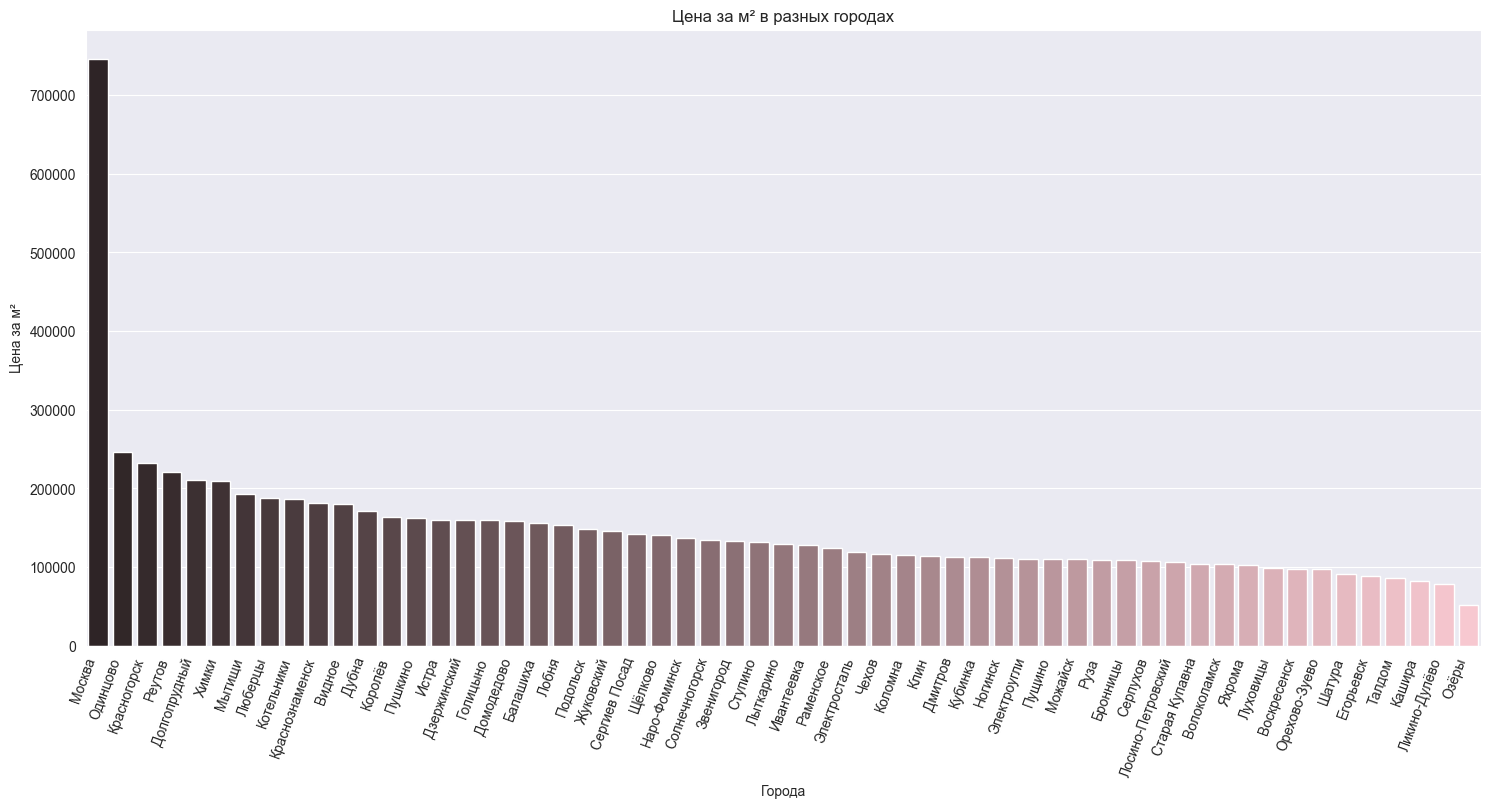

In [19]:
# График для средней цены за м2 во всех городах
sns.set_style("darkgrid")
info = pd.read_csv('sorted_info_of_city_and_price.csv')
plt.figure(figsize=(18, 8))
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=info, color='pink')
plt.title('Цена за м² в разных городах')
plt.xlabel('Города')
plt.ylabel('Цена за м²')
plt.xticks(rotation=70, ha='right')
plt.show()

In [20]:
from sklearn import preprocessing
#функция, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,author,author_type,url,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground
0,2214,3,4702,23,5,7,1,34.6,9000000.0,63,18.0,8.0,143,627,332
1,2108,3,3710,23,14,45,1,41.3,12800000.0,111,20.0,11.0,105,1073,168
2,1455,0,3618,23,10,12,1,34.4,19372498.0,111,11.8,11.7,124,1293,225
3,14,3,3394,23,4,33,1,42.9,23600000.0,117,22.9,15.0,116,170,4
4,1965,4,2874,23,1,16,1,37.7,9450000.0,67,NaN,NaN,177,761,224


<Axes: >

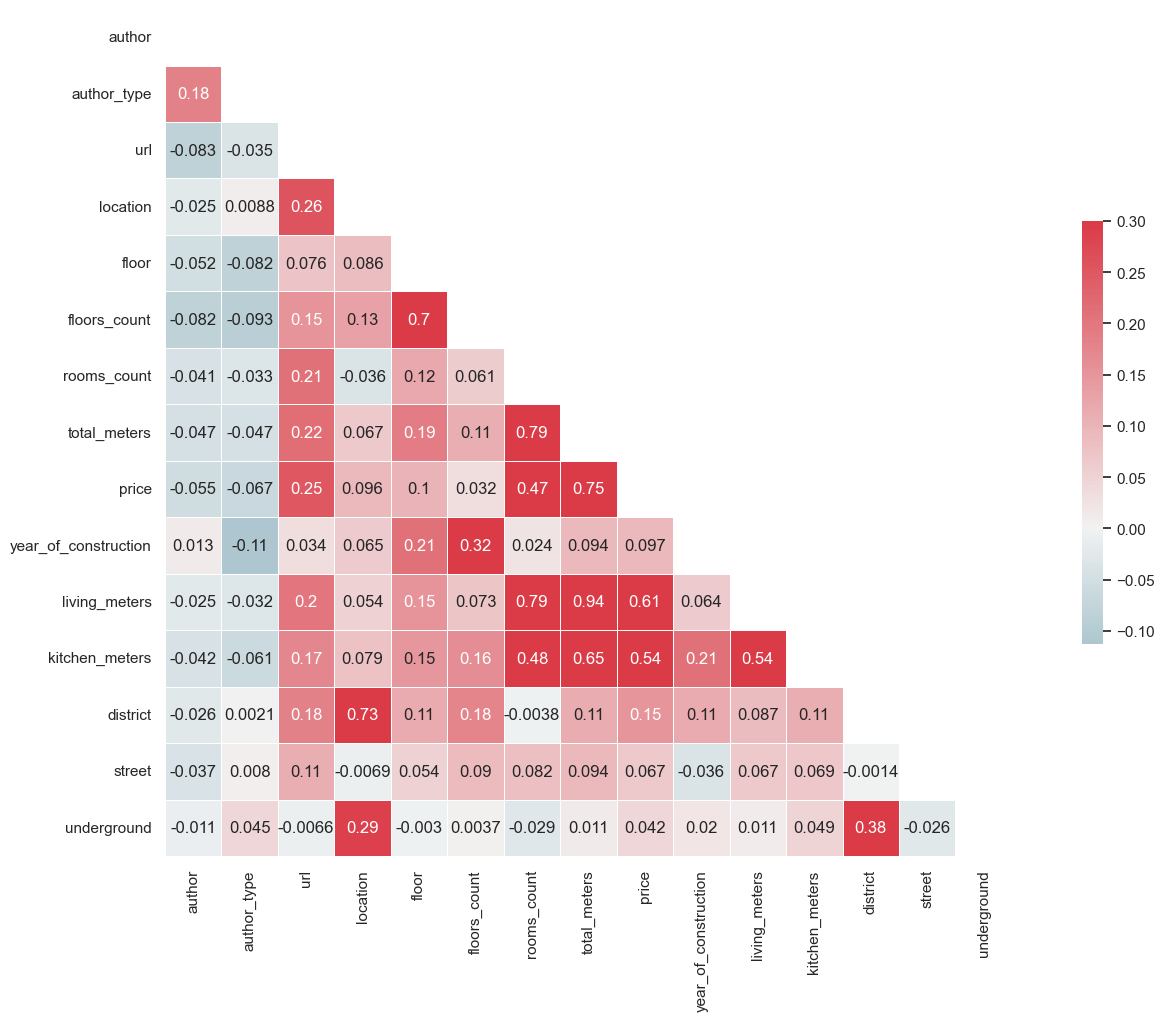

In [21]:
sns.set(style="white")


temp3 = encoded_data.copy()
corr = temp3.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #удалить там где 1 одну из колонок потому что несут 1 и тоже знч

Text(0.5, 1.0, 'Влияние количества комнат на рост цены')

<Figure size 640x480 with 0 Axes>

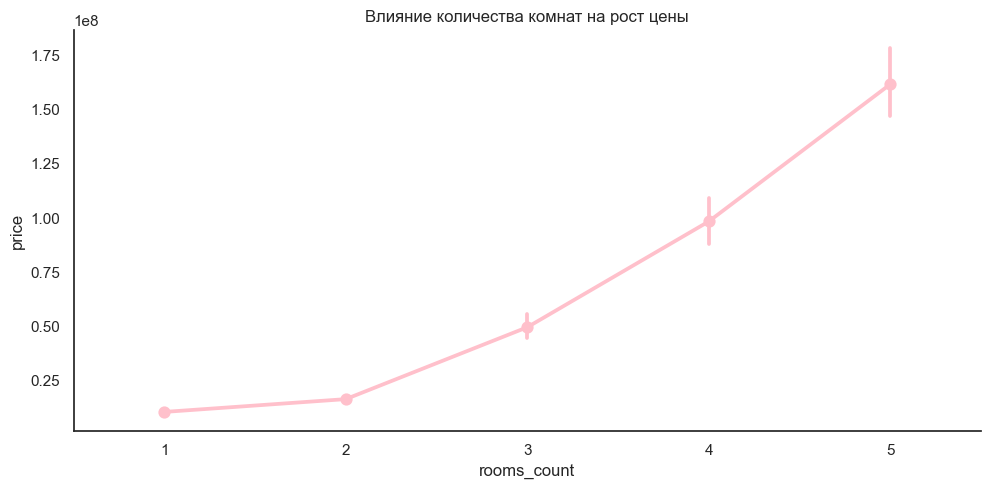

In [22]:
# for i, col in enumerate(['rooms_count', 'total_meters']): #цикл для колонок
plt.figure()
sns.catplot(x='rooms_count', y='price', data=encoded_data, kind='point', aspect=2, color='pink')
plt.title("Влияние количества комнат на рост цены")
#тут мы видим влияение класса 

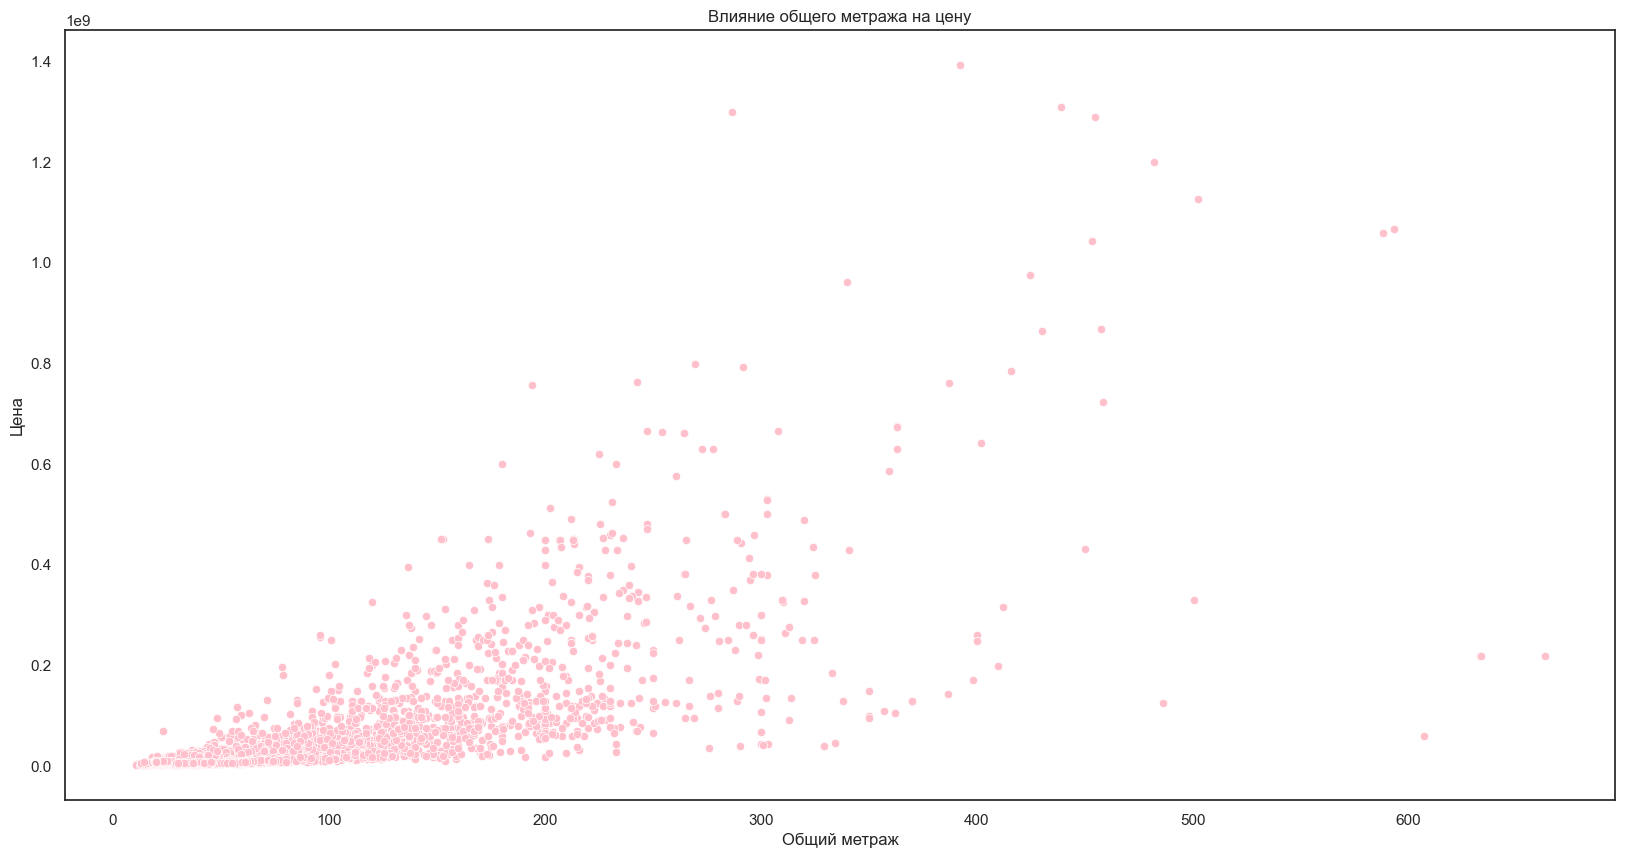

In [23]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='total_meters', y='price', data=encoded_data, color='pink')  # Изменяем цвет на фиолетовый
plt.title('Влияние общего метража на цену')
plt.xlabel('Общий метраж')
plt.ylabel('Цена')
plt.show()

После вывода данного графика, мы можем увидеть что от количества комнат в квартире, цена очень сильно растёт, особенно в промежудке между 3 и 5 квартирами.

Также можем заметить что на цену влияет размер квартиры, чем квартира меньше, тем собстевнно и меньше её цена